# *Exploratory Data Analysis of Used Cars Dataset*



# *Analysis Goals*

The analysis will be structured around the following key areas:

*Descriptive Analysis:* Summarize the dataset to understand the distribution of key features,
including:

- Year of Manufacture
- Kilometers Driven
- Fuel Type
- Transmission Type
- Owner Type
- Seating Capacity

# *Step 1: Import Python Libraries* 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

# *Step 2: Reading the Dataset* 



In [2]:
df = pd.read_csv('used_cars_data.csv')


In [3]:
df.head() 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape 

(7253, 14)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


# *Data Cleaning* 

In [6]:
df.isnull().sum() 

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
df.duplicated().sum() 

np.int64(0)

# *Data Handling* 

In [8]:
df['Price'].fillna(df['Price'].mean(), inplace=True) 

In [9]:
df[['Mileage(kmpl)', 'Unit']] = df['Mileage'].str.split(' ', expand=True) # Handling The Mileage Column to split the values into two columns as Mileage(kmpl) and Unit.

df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype('float') 

In [10]:
# Fuction for unit conversion
# kmpl = km/kg by ~1.4


def unit_conversion(mileage, unit):
    if unit == 'km/kg':
        return mileage * 1.4
    else:
        return mileage


df['Mileage(kmpl)'] = df.apply(lambda x: unit_conversion(x['Mileage(kmpl)'], x['Unit']), axis=1) 

In [11]:
df['Mileage(kmpl)']

0       37.24
1       19.67
2       18.20
3       20.77
4       15.20
        ...  
7248    20.54
7249    17.21
7250    23.08
7251    17.20
7252    10.00
Name: Mileage(kmpl), Length: 7253, dtype: float64

In [12]:
df['Mileage(kmpl)'].fillna(df['Mileage(kmpl)'].mean(), inplace=True)

In [13]:
# Handling Engine Column to split the values into two columns: Engine(CC) and Unit.
# Replace null values with None, Then to Zeros.
# Data Type Convertio to int.

df[['Engine(CC)', 'Unit']] = df['Engine'].str.split(' ', expand=True)
df['Engine(CC)'].replace({'null':None}, inplace=True)
df['Engine(CC)'].fillna(0, inplace=True) 
df['Engine(CC)'] = df['Engine(CC)'].astype('int') 

In [14]:
# Handling Power Column to split the values into two columns: Power(bhp) and Unit.
# Replace null values with None, Then to Zeros.
# Data Type Convertio to int.

df[['Power(bhp)', 'Unit']] = df['Power'].str.split(' ', expand=True)
df['Power(bhp)'].replace({'null':None}, inplace=True)
df['Power(bhp)'].fillna(0, inplace=True)
df['Power(bhp)'] = df['Power(bhp)'].astype('float') 


In [15]:
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True) # replacing null values with the mode of the column

In [16]:
df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Mileage(kmpl)', 'Unit', 'Engine(CC)',
       'Power(bhp)'],
      dtype='object')

# *Data Reduction* 



In [17]:
df1 = df.drop(columns=['S.No.', 'New_Price', 'Mileage', 'Engine', 'Power', 'Unit'], axis=1)


In [18]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)'],
      dtype='object')

In [19]:
df1.isnull().sum() 

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage(kmpl)        0
Engine(CC)           0
Power(bhp)           0
dtype: int64

In [20]:
df1.duplicated().sum() 

np.int64(1)

In [21]:
df1.drop_duplicates(inplace=True)

# *Creating Features* 

we can process the column "Name" to extract important information using brand and Model names. So, Let’s split the name and introduce new variables “Brand” and “Model”

We will play around with the variables Year and Name in our dataset. If we see the sample data, the column “Year” shows the manufacturing year of the car. So we can make new column "Car_Age".

In [22]:
df1.head() 

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,37.24,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968,140.80


In [23]:
from datetime import date 
date.today() 

datetime.date(2025, 9, 29)

In [24]:
df1['Car_Age'] = date.today().year - df1['Year']

In [25]:
df1['Brand'] = df1['Name'].str.split().str.get(0) 
df1['Model'] = df1['Name'].str.split().str.get(1) + " " + df1['Name'].str.split().str.get(2) 

In [26]:
df1['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [27]:
df1['Brand'].replace({"ISUZU":"Isuzu", "Land":"Land Rover", "Mini": "Mini Cooper"}, inplace=True)

In [28]:
len(df1['Model'].unique()) 

727

In [29]:
df1['Model'] = df1['Model'].str.lower() 

In [30]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Seats              7252 non-null   float64
 8   Price              7252 non-null   float64
 9   Mileage(kmpl)      7252 non-null   float64
 10  Engine(CC)         7252 non-null   int64  
 11  Power(bhp)         7252 non-null   float64
 12  Car_Age            7252 non-null   int64  
 13  Brand              7252 non-null   object 
 14  Model              7251 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 906.5+ KB


Now, we have done the fundamental data analysis, Featuring, and data clean-up. Let’s move to the EDA process

Lets move to perform EDA.

# *EDA Exploratory Data Analysis* 



- Statistics Summary



In [31]:
df1.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.000000,2019.000
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.000000,6500000.000
Seats,7252.0,5.277716,0.809088,0.00,5.00,5.00,5.000000,10.000
Price,7252.0,9.479468,10.192398,0.44,3.85,6.75,9.479468,160.000
Mileage(kmpl),7252.0,18.241157,4.839563,0.00,15.26,18.20,21.100000,46.956
Engine(CC),7252.0,1606.335907,607.154934,0.00,1197.00,1462.00,1968.000000,5998.000
Power(bhp),7252.0,110.043324,55.609120,0.00,74.00,91.10,138.030000,616.000
Car_Age,7252.0,11.634170,3.254405,6.00,9.00,11.00,14.000000,29.000


In [32]:
df1.describe(include='object').T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,948
Fuel_Type,7252,5,Diesel,3852
Transmission,7252,2,Manual,5203
Owner_Type,7252,4,First,5951
Brand,7252,32,Maruti,1444
Model,7251,705,swift dzire,189


From the statistics summary, we can infer the below findings :

- Years range from 1996- 2019 and has a high in a range which shows used cars contain both latest models and old model cars.
- On average of Kilometers-driven in Used cars are ~58k KM. The range shows a huge difference between min and max as max values show 650000 KM shows the evidence of an outlier. This record can be removed.
- Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue.


- It looks like Engine and Power have outliers, and the data is right-skewed.
- The average number of seats in a car is 5. car seat is an important feature in price contribution.
- The max price of a used car is 160k which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.



- Most of the sold cars use fuel of type: Diesel. 
- The most sold brand is "Maurti" which indicate two things: either it's last long or bad manufcturing quality.
- The location with high frequency of selling is: Mumbai. 
- almost +90% of the sold cars are "Manual" cars.

In [33]:
numericals = df1.select_dtypes(include=['int', 'float']).columns 
categoricals = df1.select_dtypes(exclude=['int', 'float']).columns 

print(numericals) 
print(categoricals) 

Index(['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age'],
      dtype='object')
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')


# *EDA Univariate Analysis*

<Figure size 1000x800 with 0 Axes>

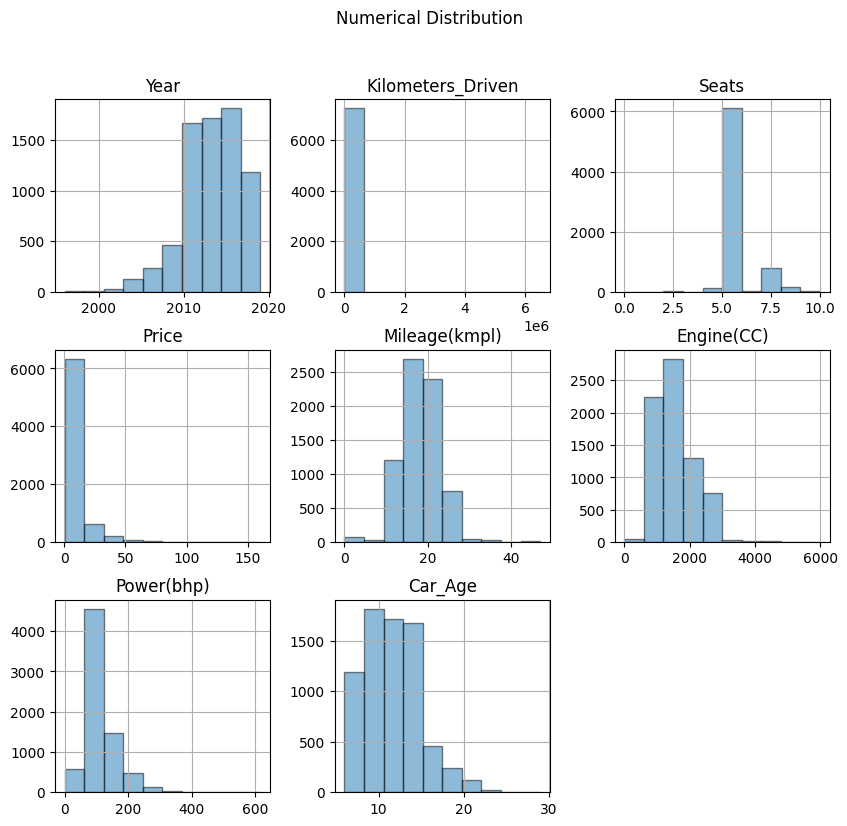

In [34]:
plt.figure(figsize=(10,8)) 
df1.hist(figsize=(10,9), bins=10, edgecolor='k', alpha=0.5)
plt.ticklabel_format(style='plain', axis='x') 
plt.suptitle('Numerical Distribution') 
plt.show() 

Name


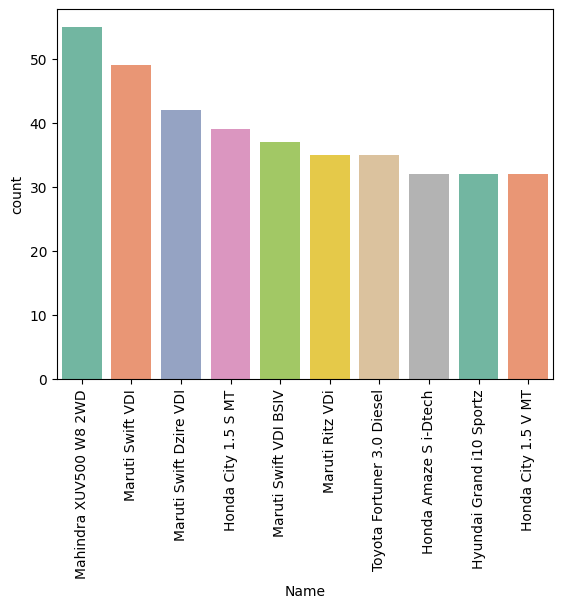

Location


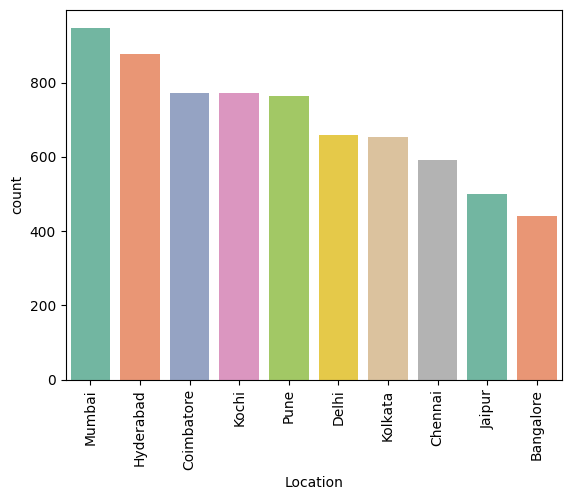

Fuel_Type


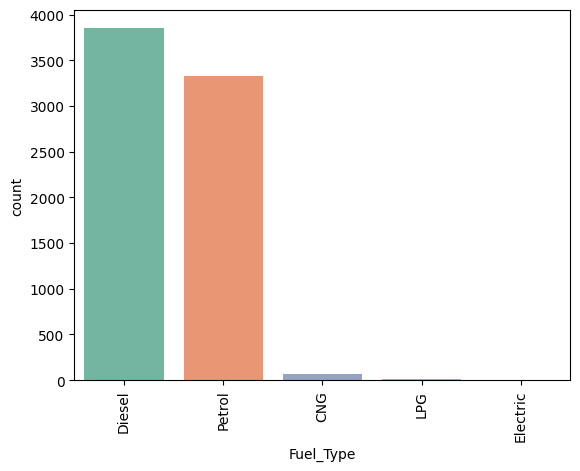

Transmission


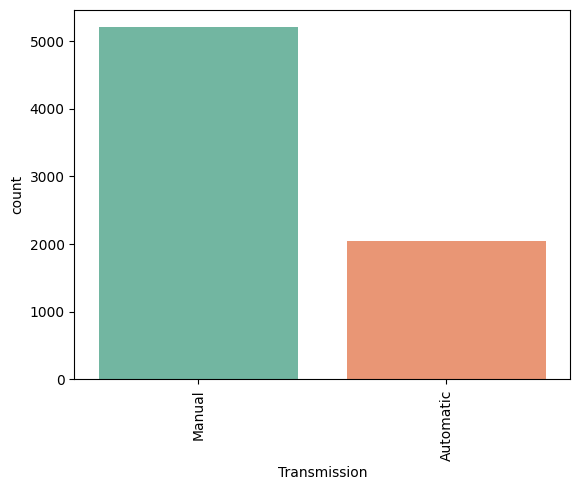

Owner_Type


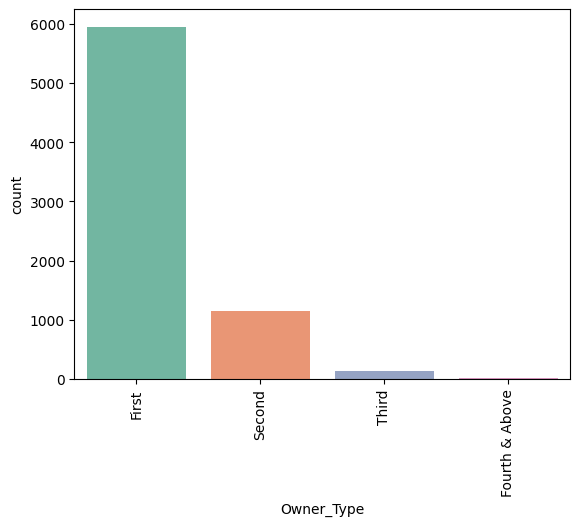

Brand


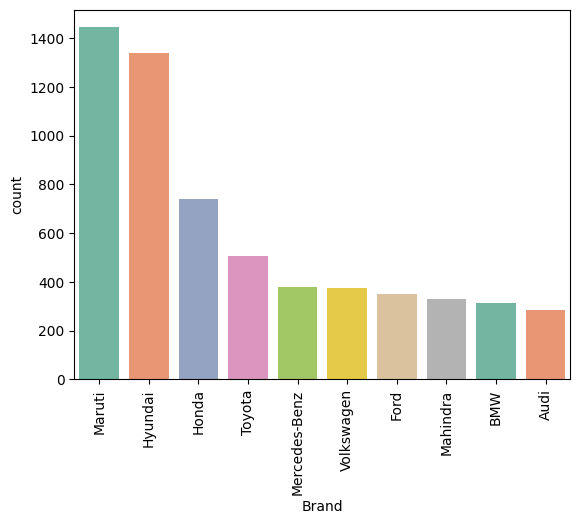

Model


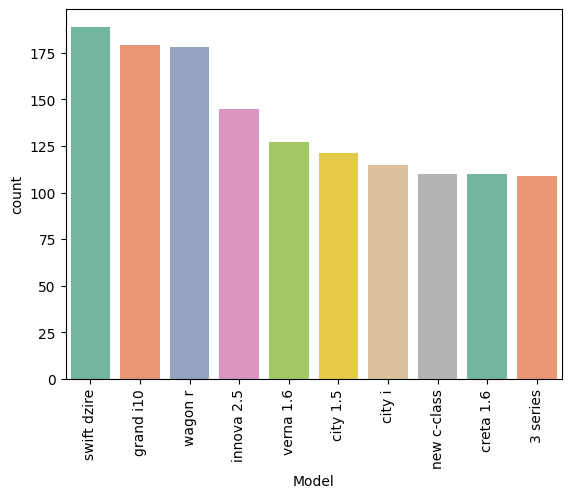

In [35]:
for col in categoricals:
    print(col) 
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().head(10).index, palette='Set2') 
    plt.xticks(rotation=90) 
    plt.show() 

From the count plot, we can have below observations:

- Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore.
- ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance.
- ~72% of cars have manual transmission.
- ~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars.
- ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai.

# *EDA Multiveriate Analysis* 


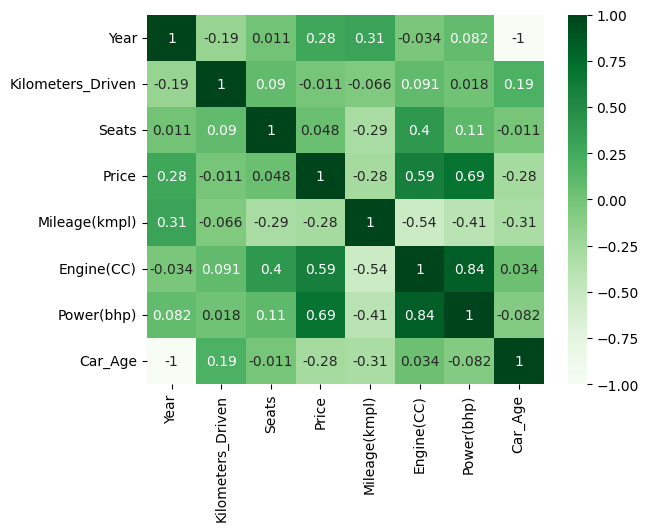

In [36]:
corr = df1[numericals].corr()
sns.heatmap(corr, annot=True, cmap='Greens') 
plt.show() 



# Key Insights from EDA

###  Price Determinants
- **Power (bhp)** shows the strongest positive correlation with car price (`r = 0.69`)
- **Engine size (CC)** is the second strongest price driver (`r = 0.59`)
- **Number of seats** has moderate positive influence on price (`r = 0.48`)

###  Fuel Efficiency Trade-offs
- Strong negative correlation between **mileage and engine size** (`r = -0.54`)
- **Powerful cars compromise on fuel efficiency** (`r = -0.41` with mileage)
- Clear performance vs efficiency trade-off observed

###  Surprising Findings
- **Kilometers driven** has negligible impact on resale price (`r = -0.011`)
- Car age shows weaker price correlation than expected
- Buyers prioritize features and performance over mileage and age

###  Feature Relationships
- **Engine size and power** are highly correlated (`r = 0.84`)
- Larger vehicles tend to have bigger engines but not necessarily more power
- Newer car models show diverse pricing based on features rather than just year

###  Market Trends
- Premium segment focuses on performance specifications
- Fuel-efficient cars target budget-conscious buyers
- Multi-seater vehicles command price premiums



#  Business Implications

### For Buyers:
- Focus on power and engine specifications when evaluating value
- Don't overpay for low mileage alone
- Consider fuel efficiency based on usage patterns

### For Sellers:
- Highlight power and engine features in listings
- Recent year models can command better prices
- Mileage history is less critical than mechanical condition

### For Dealers:
- Stock performance-oriented vehicles for higher margins
- Educate customers on actual value drivers beyond mileage
- Segment inventory based on power and feature combinations




A bar plot can be used to show the relationship between Categorical variables and continuous variables



In [37]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age', 'Brand', 'Model'],
      dtype='object')

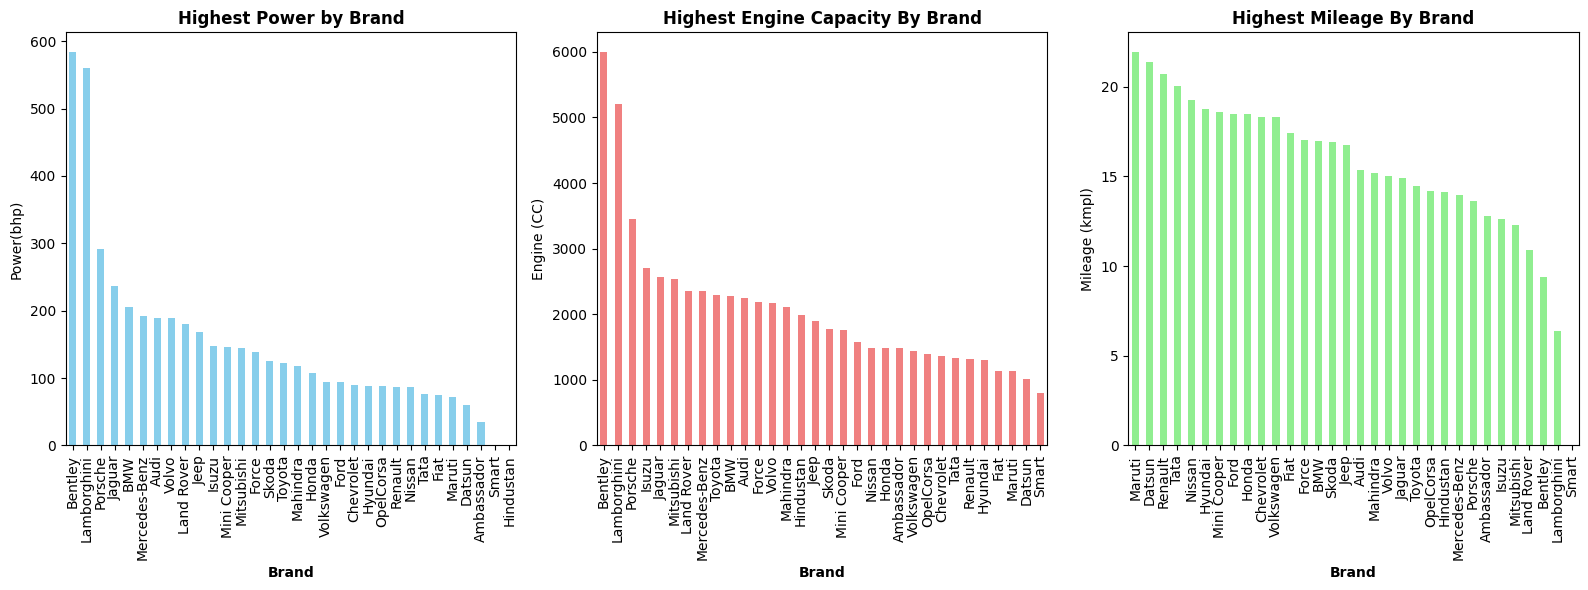

In [38]:
mileage = df1.groupby('Brand')['Mileage(kmpl)'].mean().sort_values(ascending=False) 
power = df1.groupby('Brand')['Power(bhp)'].mean().sort_values(ascending=False) 
Engine = df1.groupby('Brand')['Engine(CC)'].mean().sort_values(ascending=False) 

fig, ax = plt.subplots(1,3, figsize=(16,6)) 

power.plot(kind='bar', ax=ax[0], color='skyblue') 
ax[0].set_title('Highest Power by Brand', fontweight='bold')
ax[0].set_ylabel('Power(bhp)') 
ax[0].set_xlabel('Brand', fontweight='bold') 


Engine.plot(kind='bar', ax=ax[1], color='lightcoral')
ax[1].set_title("Highest Engine Capacity By Brand", fontweight='bold') 
ax[1].set_ylabel("Engine (CC)") 
ax[1].set_xlabel("Brand", fontweight='bold') 

mileage.plot(kind='bar', ax=ax[2], color='lightgreen')
ax[2].set_title("Highest Mileage By Brand", fontweight='bold')
ax[2].set_ylabel("Mileage (kmpl)") 
ax[2].set_xlabel("Brand", fontweight='bold') 


plt.tight_layout()
plt.show()

In [39]:
df1.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage(kmpl)',
       'Engine(CC)', 'Power(bhp)', 'Car_Age', 'Brand', 'Model'],
      dtype='object')

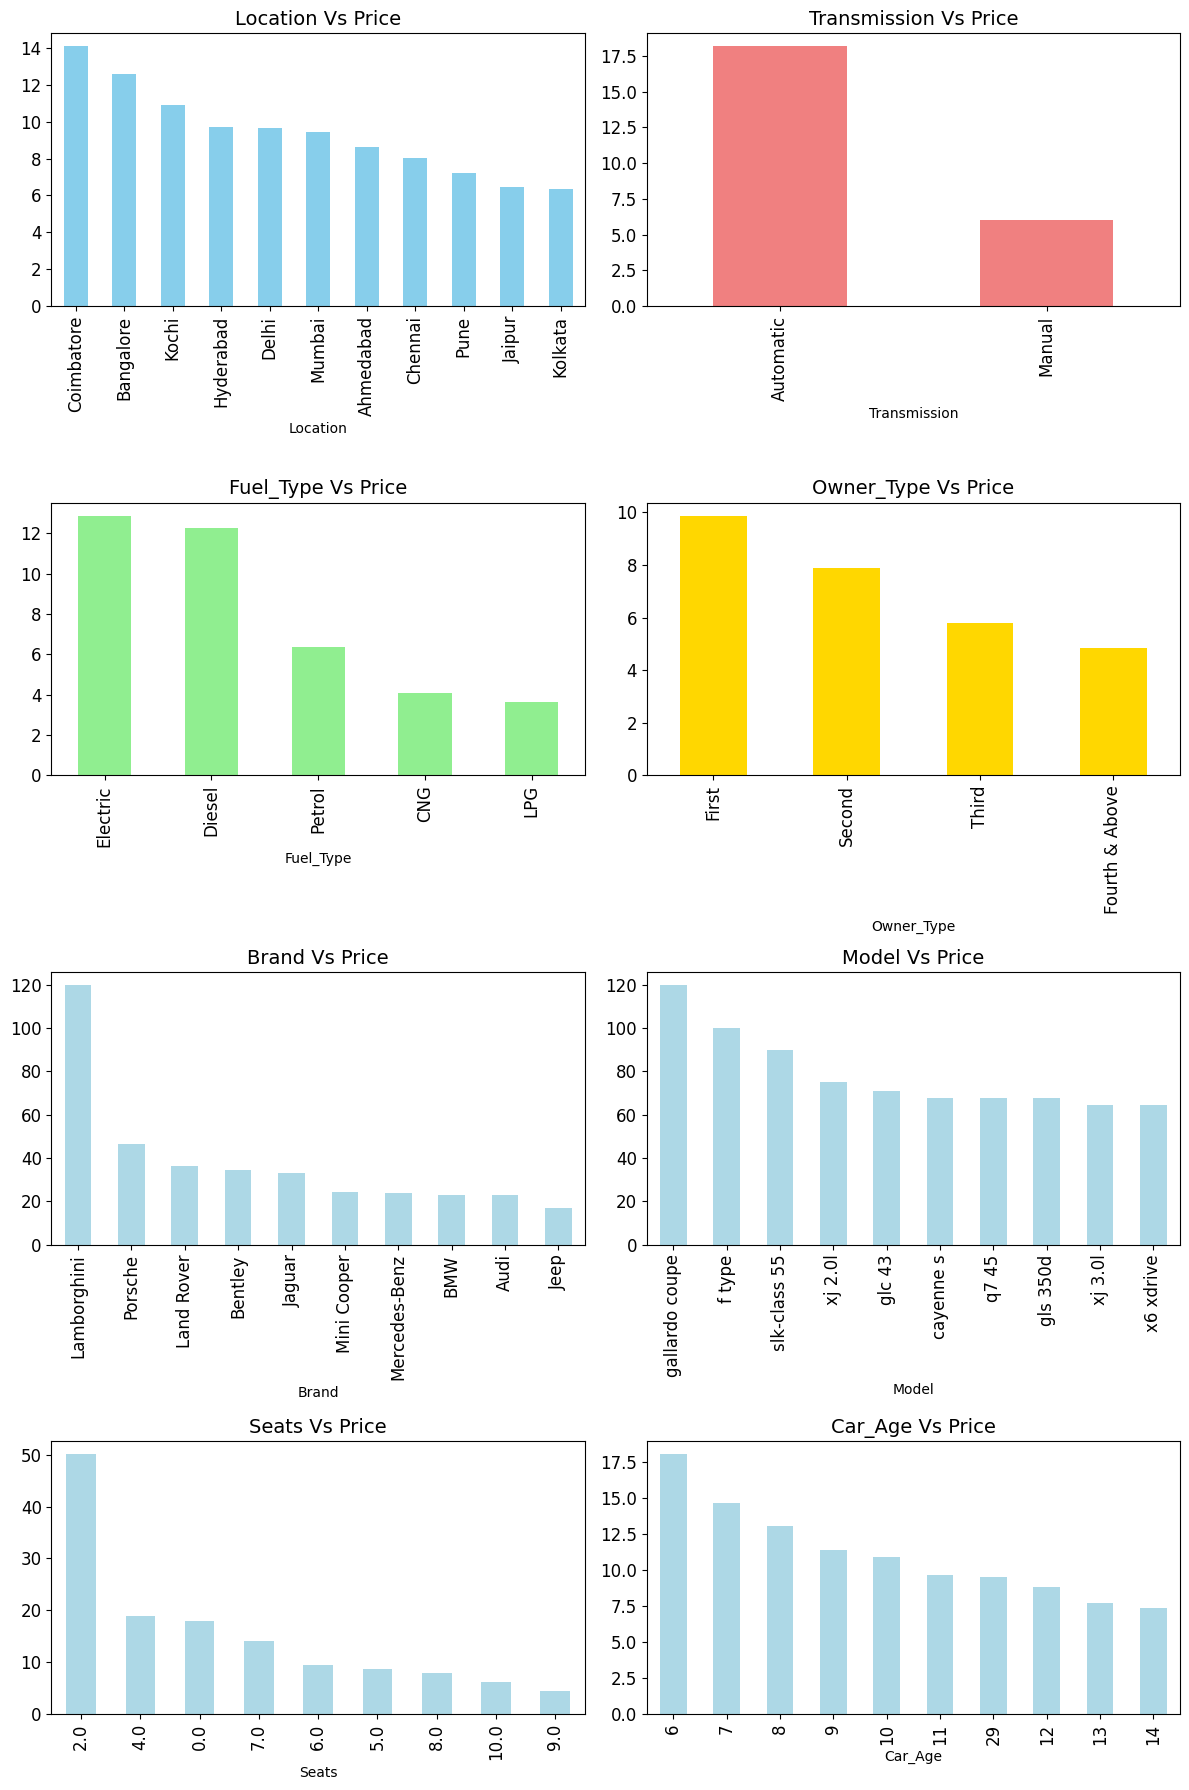

In [40]:
features = [
    ('Location', 'Location Vs Price', 'skyblue'),
    ('Transmission', 'Transmission Vs Price', 'lightcoral'),
    ('Fuel_Type', 'Fuel_Type Vs Price', 'lightgreen'),
    ('Owner_Type', 'Owner_Type Vs Price', 'gold'),
    ('Brand', 'Brand Vs Price', 'lightblue'),
    ('Model', 'Model Vs Price', 'lightblue'),
    ('Seats', 'Seats Vs Price', 'lightblue'),
    ('Car_Age', 'Car_Age Vs Price', 'lightblue')

]

fig, axarr = plt.subplots(4,2, figsize=(12,18)) 

for i, (feature, title, color) in enumerate(features):
    row, col = divmod(i, 2) 
    if feature in ['Brand', 'Model', 'Car_Age']:
        df1.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )
    else:
        df1.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(
            ax=axarr[row][col], fontsize=12, color=color
        )

    axarr[row][col].set_title(title, fontsize=14) 

plt.tight_layout() 
plt.show()     

# Key Observations from Categorical Feature Analysis

 Geographical Price Patterns

Coimbatore commands the highest used car prices
Kolkata and Jaipur show the most affordable pricing
Insight: Regional economic factors significantly influence resale values

### Transmission Impact

Automatic transmission cars have significantly higher resale value
Manual transmission cars are more budget-friendly
Insight: Market preference shifting towards convenience features

### Fuel Type Economics

Diesel and Electric vehicles maintain similar premium pricing
LPG-powered cars have the lowest resale value
Petrol cars occupy the mid-price segment
Insight: Diesel's durability and Electric's novelty command price premiums

### Ownership Influence

First-owner vehicles command the highest prices (premium for single ownership)
Second-owner cars follow with reasonable valuation
Third-owner prices dip below Fourth & above owners
Insight: First ownership highly valued, but very old cars maintain niche value

### Brand & Model Hierarchy

Lamborghini leads as the most expensive brand
Gallardo Coupe model-specific analysis shows peak pricing
Insight: Luxury and sports segments maintain exceptional resale value

### Seating Capacity Trends

2-seater cars have the highest average prices (sports/luxury segment)
4-seater vehicles follow as second most expensive
Insight: Smaller, performance-oriented seating commands premiums

### Age Depreciation Pattern

Newer model years consistently maintain higher prices
Clear correlation between recent manufacture and better resale value
Insight: Car age remains a strong determinant of market value



## **Conclusion**

This exploratory analysis reveals that used car prices are primarily driven by **brand reputation, transmission type, and ownership history**, with automatic transmissions and first-owner vehicles commanding significant premiums. Geographical location shows notable price variations, while fuel type indicates market shifts with diesel and electric vehicles maintaining higher values. The strong correlation between vehicle age and price confirms expected depreciation patterns, though features often outweigh mileage concerns. These insights equip both buyers and sellers with data-driven understanding of key value determinants, enabling smarter decisions in the used car market based on specific preferences and budget constraints.
